# **PROJECT TITLE :SPOTIFY ANALYSIS**

<div style="text-align: center; margin-top: 20px;">
    <img src="https://c.tenor.com/iczjaEFdW20AAAAC/spotify-music.gif"
         style="display: block; margin: auto; border-radius: 10px;">
</div>


In [7]:
# Importing libraries
import os
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
# Loading the dataset
df_Spotify = pd.read_csv('Data/spotifydataset.csv')
df_Spotify.head()

,Unnamed: 0,artist_name,genres,followers,artist_popularity,artist_url,track_name,album_name,release_date,duration_ms,...,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,0,Ariana Grande,pop,98934105,89,https://open.spotify.com/artist/66CXWjxzNUsdJx...,we can't be friends (wait for your love),eternal sunshine,2024-03-08,228639,...,0.646,5,-8.334,1,0.0427,0.0615,0.000030,0.0740,0.295,115.842
1,1,Ariana Grande,pop,98934105,85,https://open.spotify.com/artist/66CXWjxzNUsdJx...,the boy is mine,eternal sunshine,2024-03-08,173639,...,0.630,7,-5.854,0,0.0434,0.1570,0.000000,0.0732,0.447,97.998
2,2,Ariana Grande,pop,98934105,83,https://open.spotify.com/artist/66CXWjxzNUsdJx...,intro (end of the world),eternal sunshine,2024-03-08,92400,...,0.362,10,-9.480,1,0.0416,0.6700,0.000000,0.1760,0.385,84.726
3,3,Ariana Grande,pop,98934105,80,https://open.spotify.com/artist/66CXWjxzNUsdJx...,Save Your Tears (Remix) (with Ariana Grande) -...,After Hours (Deluxe),2020-03-20,191013,...,0.825,0,-4.645,1,0.0325,0.0215,0.000024,0.0936,0.593,118.091
4,4,Ariana Grande,pop,98934105,79,https://open.spotify.com/artist/66CXWjxzNUsdJx...,"yes, and?",eternal sunshine,2024-03-08,214994,...,0.775,1,-6.614,1,0.0548,0.1900,0.000065,0.1130,0.787,118.998


In [ ]:
# 
df_Spotify.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         1000 non-null   int64  
 1   artist_name        1000 non-null   object 
 2   genres             837 non-null    object 
 3   followers          1000 non-null   int64  
 4   artist_popularity  1000 non-null   int64  
 5   artist_url         1000 non-null   object 
 6   track_name         1000 non-null   object 
 7   album_name         1000 non-null   object 
 8   release_date       1000 non-null   object 
 9   duration_ms        1000 non-null   int64  
 10  explicit           1000 non-null   bool   
 11  track_popularity   1000 non-null   int64  
 12  danceability       1000 non-null   float64
 13  energy             1000 non-null   float64
 14  key                1000 non-null   int64  
 15  loudness           1000 non-null   float64
 16  mode               1000 n

In [13]:
df_Spotify.shape

(1000, 23)

In [14]:
df_Spotify.describe()

,Unnamed: 0,followers,artist_popularity,duration_ms,track_popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
count,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,499.500000,1.150655e+07,59.429000,212368.619000,59.429000,0.611430,0.660562,5.243000,-7.160373,0.613000,0.091402,0.265840,0.074700,0.188810,0.516641,122.143448
std,288.819436,2.293890e+07,23.884963,65706.472572,23.884963,0.167246,0.207568,3.613725,4.479642,0.487307,0.090441,0.288895,0.225472,0.145454,0.232896,28.053658
min,0.000000,2.000000e+00,0.000000,51680.000000,0.000000,0.069000,0.003540,0.000000,-39.482000,0.000000,0.023200,0.000005,0.000000,0.026000,0.032600,49.305000
25%,249.750000,1.038784e+06,57.000000,173083.000000,57.000000,0.505500,0.539500,2.000000,-8.334250,0.000000,0.037975,0.028325,0.000000,0.095700,0.343500,99.983500
50%,499.500000,3.923159e+06,67.000000,204382.500000,67.000000,0.634000,0.680500,5.000000,-5.943500,1.000000,0.054800,0.152500,0.000004,0.129000,0.522000,122.073500
75%,749.250000,1.142132e+07,74.000000,244192.750000,74.000000,0.728250,0.820000,9.000000,-4.582500,1.000000,0.106000,0.416250,0.000586,0.246500,0.686250,138.667250
max,999.000000,1.194287e+08,92.000000,707160.000000,92.000000,0.964000,0.998000,11.000000,0.273000,1.000000,0.874000,0.996000,0.972000,0.984000,0.973000,201.776000


In [15]:
# Checking for missing values
df_Spotify.isnull().sum()

Unnamed: 0             0
artist_name            0
genres               163
followers              0
artist_popularity      0
artist_url             0
track_name             0
album_name             0
release_date           0
duration_ms            0
explicit               0
track_popularity       0
danceability           0
energy                 0
key                    0
loudness               0
mode                   0
speechiness            0
acousticness           0
instrumentalness       0
liveness               0
valence                0
tempo                  0
dtype: int64

There are missing values in genres .

In [19]:
# Filling missing values with the mean
most_common_genre = df_Spotify['genres'].mode()[0]
df_Spotify['genres'] = df_Spotify['genres'].fillna(most_common_genre)
df_Spotify['genres'].isnull().sum()

0

In [20]:
df_Spotify.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         1000 non-null   int64  
 1   artist_name        1000 non-null   object 
 2   genres             1000 non-null   object 
 3   followers          1000 non-null   int64  
 4   artist_popularity  1000 non-null   int64  
 5   artist_url         1000 non-null   object 
 6   track_name         1000 non-null   object 
 7   album_name         1000 non-null   object 
 8   release_date       1000 non-null   object 
 9   duration_ms        1000 non-null   int64  
 10  explicit           1000 non-null   bool   
 11  track_popularity   1000 non-null   int64  
 12  danceability       1000 non-null   float64
 13  energy             1000 non-null   float64
 14  key                1000 non-null   int64  
 15  loudness           1000 non-null   float64
 16  mode               1000 n

In [ ]:
# Save the cleaned dataset to excel
df_Spotify.to_excel('Data/Spotifydataset_cleaned.xlsx', index=False)

# **DATA VISUALIZATION**

### **1.Bar Charts: Top 15 genres by count**

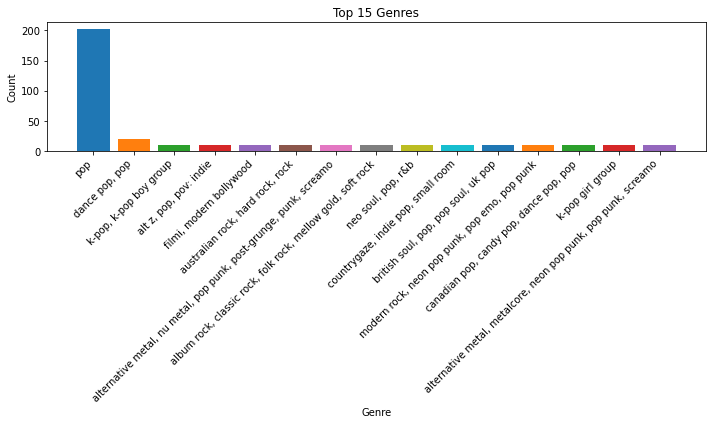

In [32]:
top_genres = df_Spotify['genres'].value_counts().head(15)
colors = plt.cm.tab10.colors[:len(top_genres)] 
plt.figure(figsize=(10, 6))
plt.bar(top_genres.index, top_genres.values, color=colors)
plt.xticks(rotation=45, ha='right')
plt.title('Top 15 Genres')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.tight_layout()
plt.show()


Pop is the most common genre in the dataset, with about 250 tracks labeled as pop, indicating a mainstream music focus.

### **2. Number of songs released by year: Energy vs Popularity**

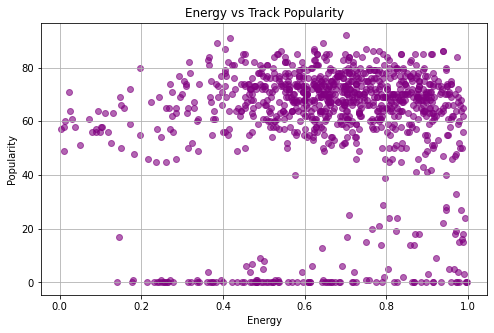

In [34]:
plt.figure(figsize=(8, 5))
plt.scatter(df_Spotify['energy'], df_Spotify['track_popularity'], alpha=0.6, color='purple')
plt.title('Energy vs Track Popularity')
plt.xlabel('Energy')
plt.ylabel('Popularity')
plt.grid(True)
plt.show()


The Energy vs Popularity implies that energy doesn't directly affect popularity and other features might matter more (like genre, danceability, etc.).

### **3. Line Plot: Distribution of danceability**

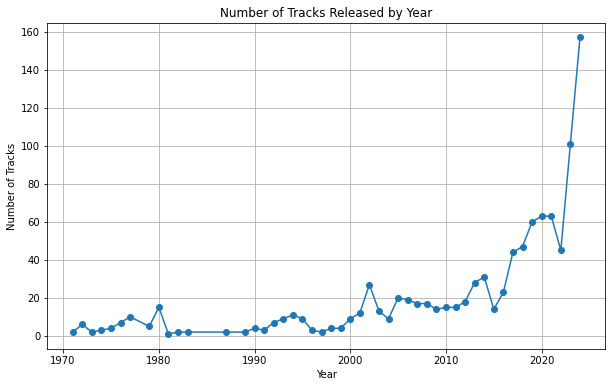

In [35]:
df_Spotify['release_date'] = pd.to_datetime(df_Spotify['release_date'], errors='coerce')
df_Spotify['year'] = df_Spotify['release_date'].dt.year

yearly_counts = df_Spotify['year'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
plt.plot(yearly_counts.index, yearly_counts.values, marker='o')
plt.title('Number of Tracks Released by Year')
plt.xlabel('Year')
plt.ylabel('Number of Tracks')
plt.grid(True)
plt.show()


Most tracks in the dataset were released in 2020, followed by 2019 and 2018.This suggests the dataset is heavily weighted toward recent years, especially 2017–2021.

### **4. Histogram: Distribution of danceability**

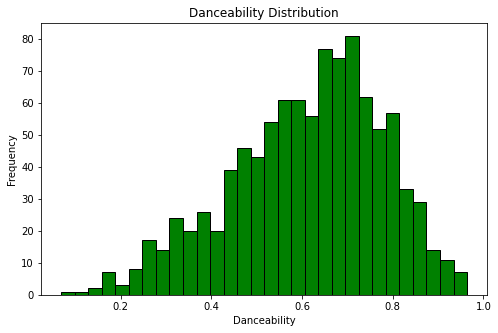

In [36]:
plt.figure(figsize=(8, 5))
plt.hist(df_Spotify['danceability'], bins=30, color='green', edgecolor='black')
plt.title('Danceability Distribution')
plt.xlabel('Danceability')
plt.ylabel('Frequency')
plt.show()


The above Histogram suggests that most songs have moderate danceability, rather than extreme high or low values.